# <p style="text-align: center;"> FAUD DETECTION PROJECT</p>
If a fraudolent activity is to happen, customers may be charged for items that they did not purchase. It is thus important for banks to be able to detect such activities as soon as possible in order to protect their customers.

The dataset used in this analysis has been downloaded from [Keggle](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data).

# Imports

In [1]:
# Data manipulation 
import numpy as np
import pandas as pd

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns

# Setting plot style
plt.style.use('ggplot')

df = pd.read_csv('data/creditcard.csv')

## Exploratory data analysis

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

From the description of the dataset we know that the V1 to V28 features went through a principal component analysis (PCA) and have been anonymized. Also they have been scaled already as a consequence of the PCA. 

In [7]:
# Let's check if there are any missing data
assert df.notnull().all().all()

([<matplotlib.axis.XTick at 0x255800012b0>,
 <a list of 2 Text xticklabel objects>)

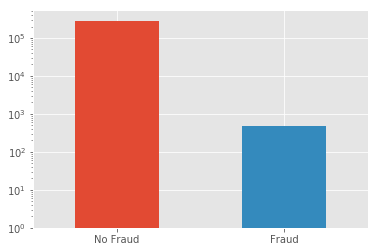

In [8]:
# Let's plot the 'Class' category
df['Class'].value_counts().plot(kind='bar', log=True)
plt.xticks(np.arange(2), ['No Fraud', 'Fraud'], rotation='horizontal')

As can be seen the dataset is heavilly skewed and many transactions are categorized as not fraudolent. If we were to use the dataset as it is, the model would probably not give reliable predictions and would likely overfit thinking many transactions are not a fraud. 

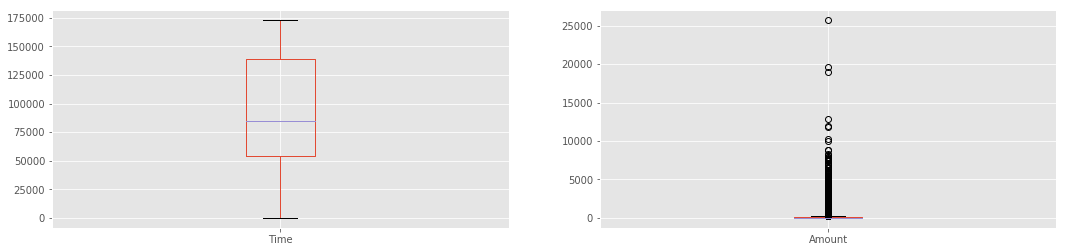

In [9]:
# Some more distributions
fig, ax = plt.subplots(1, 2, figsize=(18,4))
df['Time'].plot(kind='box', ax=ax[0])
df['Amount'].plot(kind='box', ax=ax[1])


C:\Users\bertoli.EURIS\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.0, 172792.0)

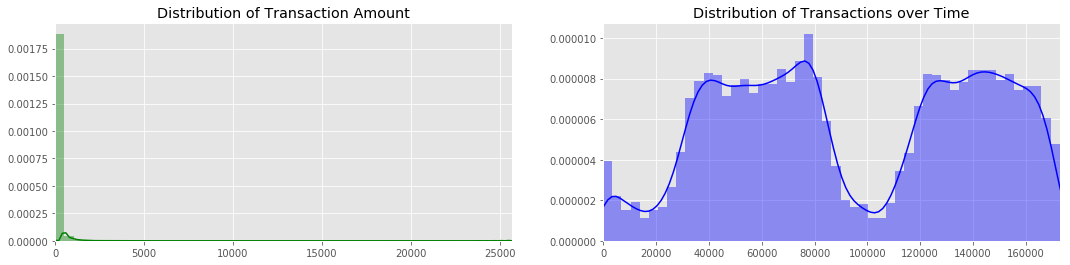

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount = df.Amount.values
time = df.Time.values

sns.distplot(amount, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim(min(amount), max(amount))

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transactions over Time')
ax[1].set_xlim(min(time), max(time))

The bulk of the amount of money in each transaction seem to be small amount with only few cases of large amounts. The time variable seems to be recorded in seconds starting from the first transaction of the day, thus the distribution spans over all the transactions occurred over about two days. It is reasonable to assume that the drop in trasactions that occurs approximately after 28 hours since the first transaction occurs during the night.

## Scaling
Since we are informed that most of our dataset is already scaled but we can notice that 'Time' and 'Amount' are not, we need to scale them. Scaling is important since many algorithm use distance to inform them, if we have features with different scales this can trick the algorithm.

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is more robust when dealing with outlyers and since there might be a few in 'Amount' let's use this one
rob_scaler = RobustScaler()

df['amount_scaled'] = rob_scaler.fit_transform(df.Time.values.reshape(-1, 1))
df['time_scaled'] = rob_scaler.fit_transform(df.Amount.values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


## Splitting the original dataset

We will subsample our dataset later but we will want to test our model on the original dataset. Thus we need to divide into training and testing set now.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=42)

for train_index, test_index in sss.split(X, y):
    
    print("TRAIN: ", train_index, " TEST: ", test_index)
    
    X_train_original, X_test_original = X.iloc[train_index], X.iloc[test_index]
    Y_train_original, Y_test_original = y.iloc[train_index], y.iloc[test_index]

TRAIN:  [126247  42508 122710 ...   3441 233802  85418]  TEST:  [143645  61669  35129 ... 217907   7852 185403]
TRAIN:  [ 20619  97458 219035 ... 281653  57818  76882]  TEST:  [  9718  80066 276277 ...  98364 270680 279675]
TRAIN:  [273713  30166 249186 ... 149666 212595 159533]  TEST:  [159935  56996 121835 ... 151555 125653 126677]
TRAIN:  [ 96194 136698 158953 ...  64770 269440  20051]  TEST:  [237103  35572 264116 ... 280411  54677 267783]
TRAIN:  [ 56760 213605 120507 ...  96727 175239  94119]  TEST:  [156759  37862 272517 ... 137564 244284 195760]


## Subsampling
As mentioned above the dataset as it stands is heavily skewed and would lead to overfitting. We thus want to select a subset of data that is balanced and that we can use to train our model that later will be tested over the original dataset.

In [13]:
# How many samples we have classified as fraudolent?
n_fraud = df['Class'].value_counts()[1]

fraud = df[df['Class'] == 1]
no_fraud = df[df['Class'] == 0]

# Randomly select a subsample of non fraudolent activities of the same size as the fraudolent one
selected = no_fraud.sample(n_fraud)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
45662,1.211085,-0.161124,0.680086,-0.115603,-0.922123,-0.835746,-0.360841,0.020207,0.263445,-0.019948,...,-0.304265,0.114767,0.572832,0.025737,0.876665,-0.081853,0.000606,0,-0.496317,-0.173269
178800,-0.729159,-1.183165,1.291826,-2.166659,0.781129,-0.643420,-0.511645,0.021087,-0.685464,0.262652,...,1.259165,0.013171,0.786165,-0.481183,-0.349996,-0.031275,-0.021126,0,0.459298,-0.028645
178734,1.950047,-0.118470,-0.838379,0.383980,-0.160154,-0.135987,-0.605564,0.168983,0.737357,-0.361800,...,-0.589743,0.433252,0.583193,-0.638099,0.109967,-0.014517,-0.016545,0,0.458922,-0.258646
142602,-0.473896,1.080028,1.695522,-0.015292,0.039882,-0.595345,0.690249,0.000466,-0.557260,-0.381485,...,-0.346140,0.032176,0.405871,-0.280873,0.077727,0.288845,0.122649,0,0.001480,-0.294977
34915,-0.986524,-0.552171,2.498952,-1.647624,-0.599121,-0.353186,-0.156690,-0.011523,-0.419134,0.117055,...,0.884200,-0.247055,0.054785,0.584520,-0.119990,0.105553,-0.087276,0,-0.549959,0.755397


In [14]:
# Concatenate the samples in the final subsample
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

subsample = pd.concat([selected, fraud])

# Let's shuffle the new subsample
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-0.903844,0.859186,1.029357,-1.003723,0.873935,-1.142195,1.014569,-0.205983,-0.304793,-0.700598,...,-0.898074,-0.315936,0.005288,0.721931,0.249328,0.003292,-0.034742,0,0.372044,-0.294977
1,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,-12.618163,...,-0.350563,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036,1,0.108225,0.222595
2,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,-8.511767,...,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1,-0.678239,1.089779
3,-0.602930,0.014665,1.315931,-0.871010,0.375122,-0.202562,0.087552,-0.013125,-1.579309,0.197419,...,-0.606181,-0.225027,0.623968,0.381131,0.837292,0.003017,0.068991,0,0.619356,-0.167680
4,-0.067672,4.251181,-6.540388,7.283657,0.513541,-2.635066,-1.865911,0.780272,-3.868248,-4.851487,...,-0.469938,0.007128,-0.388147,-0.493398,0.466468,0.566370,0.262990,1,0.722365,-0.296653


1    492
0    492
Name: Class, dtype: int64

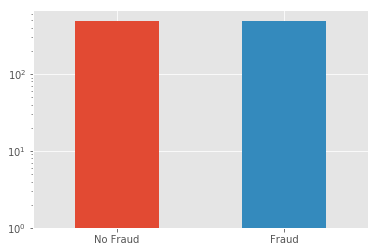

In [15]:
# Let's check the 'Class' category
subsample['Class'].value_counts().plot(kind='bar', log=True)
plt.xticks(np.arange(2), ['No Fraud', 'Fraud'], rotation='horizontal')

subsample['Class'].value_counts()

## Correlation matrix study

Now that we have a balanced dataset we can study the correlation between the features.

Text(0.5, 1.0, 'Heatmap of Correlation')

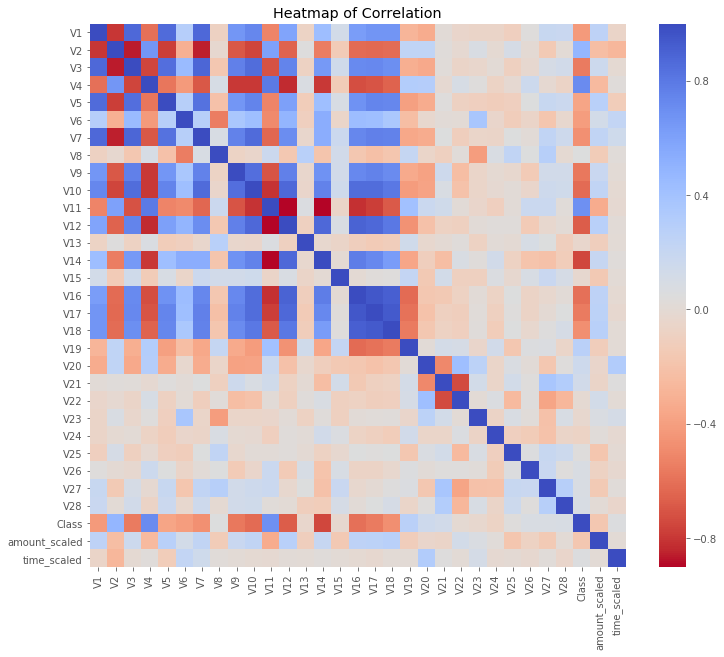

In [16]:
corr = subsample.corr()

plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr, cmap='coolwarm_r')
plt.title('Heatmap of Correlation')

As can be seen from the heat map some of the features are correlated with fraud transactions. In particular V1, V3, V5, V6, V7, V9, V10, V12, V14, V16, V17 and V18 are negatively correlated with the 'Class' feature, thus the lower any these are the more likely it is that the transaction will be classified as a fraud. On the other hand the V2, V4 and V11 are positively correlated with the 'Class' feature meaning that the higher any of these are, the less likely it is that the transaction will be identified as a fraud.

Let us now see in more details the various correlations.

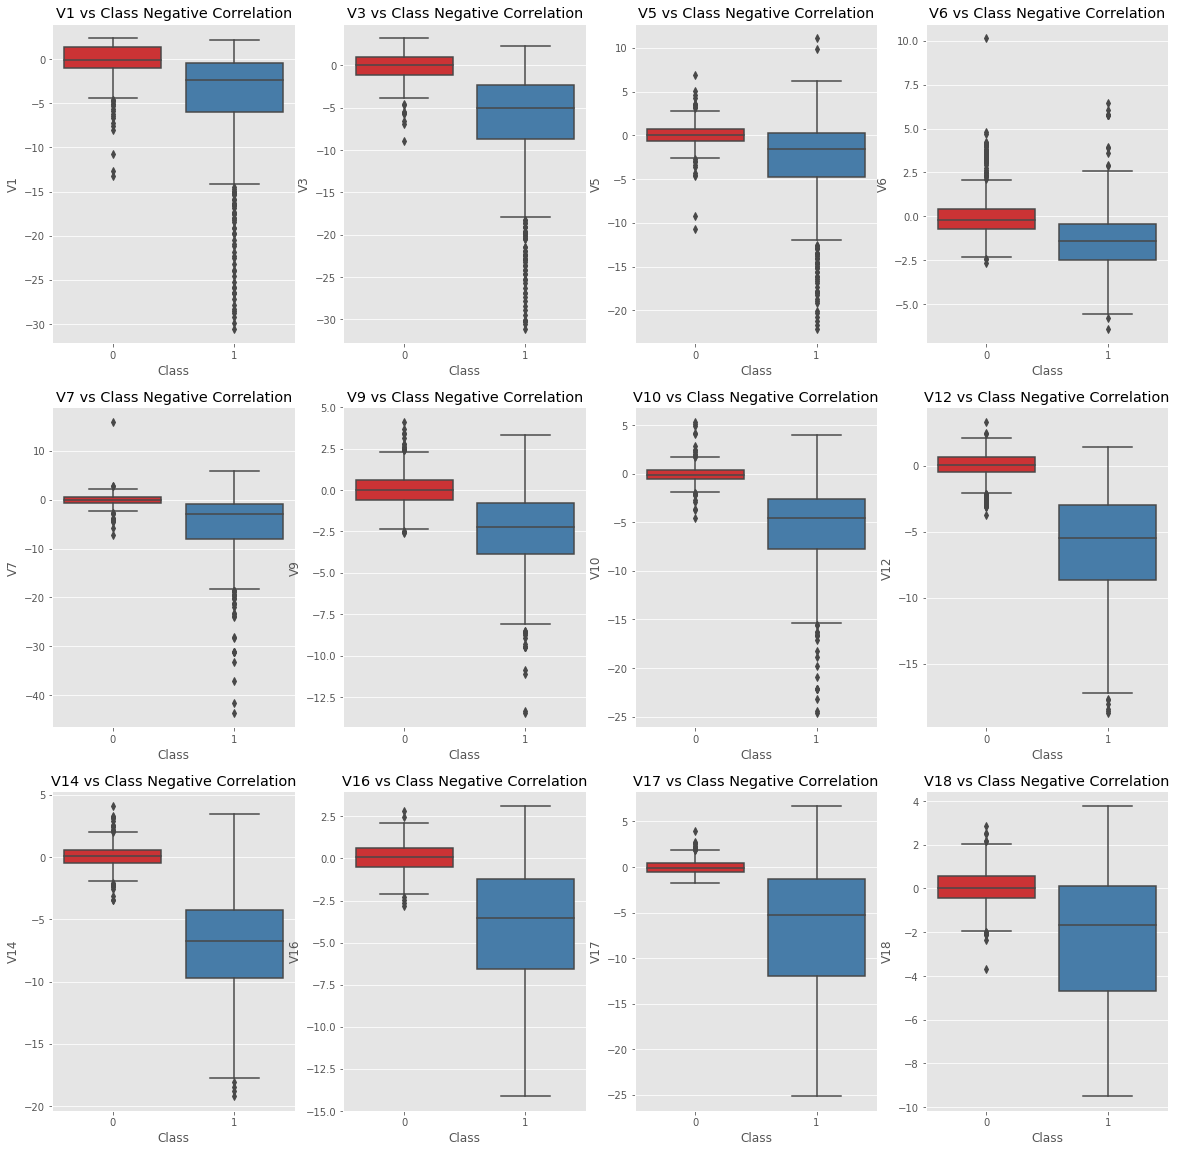

In [17]:
f, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,20))

# Negative correlations with 'Class'
neg_cor = ('V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18')

i = 0
j = 0

for var in neg_cor:

    sns.boxplot(x="Class", y=var, data=subsample, palette='Set1', ax=axes[i, j])
    axes[i, j].set_title('{} vs Class Negative Correlation'.format(var))
    
    j += 1
    
    if j > 3:
        
        i += 1
        j = 0

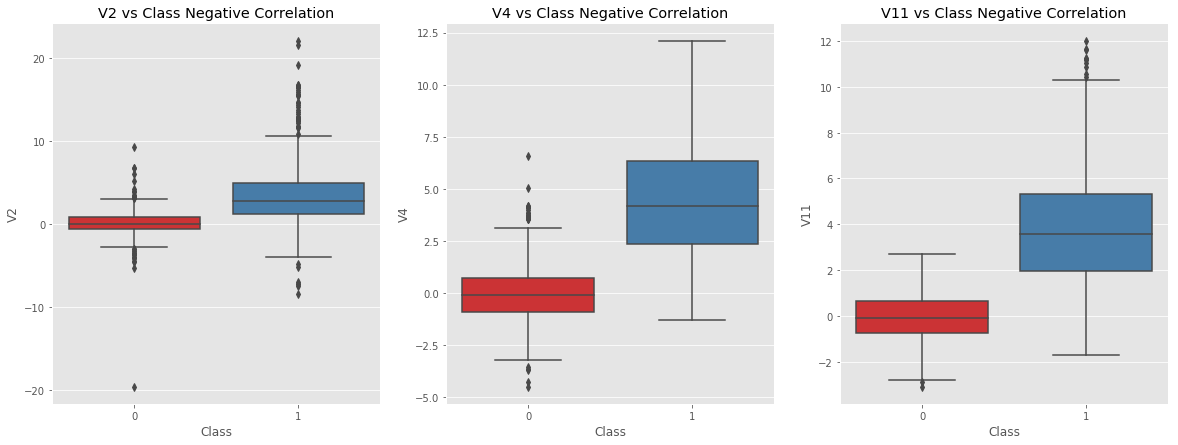

In [18]:
f, axes = plt.subplots(ncols=3, figsize=(20,7))

# Positive correlations with 'Class'
pos_cor = ('V2', 'V4', 'V11')

for i, var in enumerate(pos_cor):
    
    sns.boxplot(x="Class", y=var, data=subsample, palette='Set1', ax=axes[i])
    axes[i].set_title('{} vs Class Negative Correlation'.format(var))

## Outliers removal

In [this website](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/) two methods to spot outliers are illustrated. Here the interquartile range method (IQR) will be used, in this method the IQR is calculated as the difference between the 75th and the 25th percentile. The IQR is then multiplyed by a factor k and data points above the k*IQR are considered outliers. The k factor is usually 1.5 but higher values can be used in case of extreme outliers.  

In [19]:
features = ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18')

# This will store the lower and maximum threshold values for data points removal
kiqr_min_max = {}

# The k factor
k = 2.5

# Let's drop from the database the outliers
for i in features:
    
    Q25 = subsample[i].quantile(0.25)
    Q75 = subsample[i].quantile(0.75)
    
    IQR = Q75 - Q25

    min_val = Q25 - k * IQR
    max_val = Q75 + k * IQR
    
    kiqr_min_max[i] = (min_val, max_val)
    
    subsample_drop = subsample[~((subsample[i] < min_val) | (subsample[i] > max_val))]

Text(0.5, 1.0, 'V1 vs Class Negative Correlation\nAfter dropping outliers')

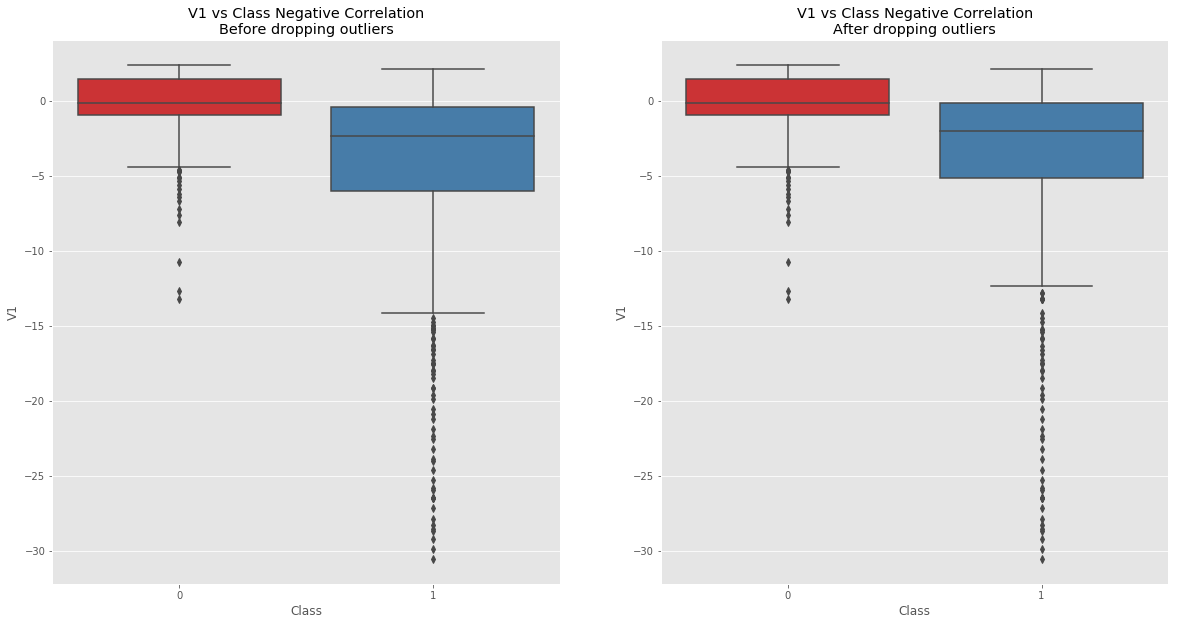

In [20]:
f, axes = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(x="Class", y='V1', data=subsample, palette='Set1', ax=axes[0])
axes[0].set_title('V1 vs Class Negative Correlation\nBefore dropping outliers')
    
sns.boxplot(x="Class", y='V1', data=subsample_drop, palette='Set1', ax=axes[1])
axes[1].set_title('V1 vs Class Negative Correlation\nAfter dropping outliers')
    

## Dimesionality reduction

In order to visualize the classes, we can use some dimensionality reduction techniques. Here the t-SNE is used, watch [this video](https://www.youtube.com/watch?v=NEaUSP4YerM) for more information. This method allows to visualize in a lower  dimensional space the clusters present in the original features space. 

In [52]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

X = subsample_drop.drop('Class', axis=1)
y = subsample_drop['Class']

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

truncatedSVD = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42)
X_svd = truncatedSVD.fit_transform(X)


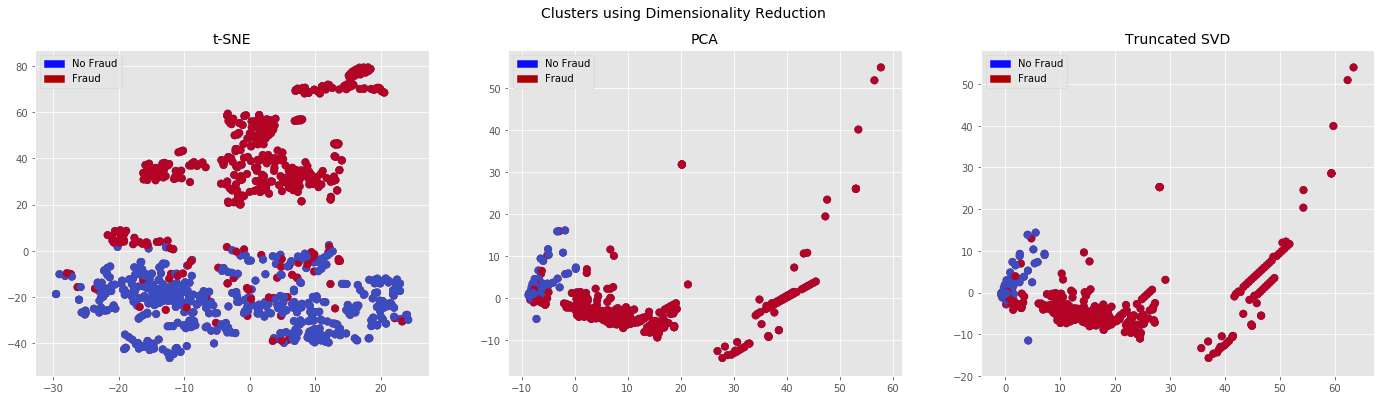

In [53]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)

ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Classifiers

Let us now train four different classifiers in order to better distinguish between fraudolent and non fraudolent activities and later decide which one performs better.

In [54]:
# Let us plit the sample
from sklearn.model_selection import train_test_split

X = subsample_drop.drop('Class', axis=1)
y = subsample_drop['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# import the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    KNeighborsClassifier()]

for classifier in classifiers:
    
    pipeline = Pipeline(steps=[('classifier', classifier)])
    
    pipeline.fit(X_train, y_train)
    
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\bertoli.EURIS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bertoli.EURIS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bertoli.EURIS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bertoli.EURIS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bertoli.EURIS\AppData\Local\Continuum\a

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
